<a href="https://colab.research.google.com/github/datasocode/Alimentation-Mondiale_Exploration-Python-de-la-Sous-Nutrition/blob/main/De%CC%81crypter_les_statistiques_alimentaires_mondiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairies Python

In [ ]:
import numpy as np
import pandas as pd

# Importation et vérification des données

In [ ]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
population = pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


# La proportion de personnes en état de sous-nutrition en 2017

In [ ]:
population = pd.read_csv('population.csv')

In [ ]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
population_2017 = population.loc[population['Année'] == 2017,:]

#. Loc [] qui permet de sélectionner des lignes et des colonnes dans un DataFrame.

population_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [ ]:
total_population_2017 = population_2017.groupby('Zone').sum()['Valeur'] * 1000

# J’utilise la méthode groupby et sum pour regrouper les valeurs de Zone et obtenir la somme de ces valeurs

In [ ]:
pd.DataFrame(total_population_2017).head()

,Valeur
Zone,
Afghanistan,36296113.0
Afrique du Sud,57009756.0
Albanie,2884169.0
Algérie,41389189.0
Allemagne,82658409.0


In [ ]:
a = total_population_2017.sum()
a

7548134111.0

In [ ]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
sous_nutrition.dtypes

# J’utilise la méthode. Dtypes pour vérifier les types de données de chaque colonne, le fichier sous nutrition.

Zone      object
Année     object
Valeur    object
dtype: object

In [ ]:
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1',0.1).astype('float')

# La méthode str.replace() remplace toutes les occurrences de '<0.1' par '0.1', puis la méthode .astype(float)
# convertit les valeurs de la colonne en nombres décimaux (float).

In [ ]:
sous_nutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [ ]:
sous_nutrition.loc[sous_nutrition['Valeur'] > 0].head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018']
sous_nutrition_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,NaN


In [ ]:
total_sous_nutrition_2017 = sous_nutrition_2017.groupby('Zone').sum()['Valeur'] *1000000

In [ ]:
pd.DataFrame(total_sous_nutrition_2017).head()

,Valeur
Zone,
Afghanistan,10500000.0
Afrique du Sud,3100000.0
Albanie,100000.0
Algérie,1300000.0
Allemagne,0.0


In [ ]:
b = total_sous_nutrition_2017.sum()
b

537700000.0

In [ ]:
proportion = b/a * 100

# Multipliez le résultat par 100 pour obtenir le pourcentage de la population en sous-nutrition.
# Utilisez la fonction round () pour arrondir le résultat à deux décimales.

proportion.round(2)

7.12

# Le nombre théorique de personnes qui pourraient être nourries.

In [ ]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dispo_alimentaire_2017 = dispo_alimentaire.groupby('Zone').sum()['Disponibilité alimentaire (Kcal/personne/jour)']
dispo_alimentaire_2017.head()

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Algérie           3293.0
Allemagne         3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
df = pd.merge(dispo_alimentaire_2017,total_population_2017, on ='Zone', how ='left')
df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Valeur
Zone,,
Afghanistan,2087.0,36296113.0
Afrique du Sud,3020.0,57009756.0
Albanie,3188.0,2884169.0
Algérie,3293.0,41389189.0
Allemagne,3503.0,82658409.0


In [ ]:
df['total'] = df['Valeur'] * df['Disponibilité alimentaire (Kcal/personne/jour)']
df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Valeur,total
Zone,,,
Afghanistan,2087.0,36296113.0,7.574999e+10
Afrique du Sud,3020.0,57009756.0,1.721695e+11
Albanie,3188.0,2884169.0,9.194731e+09
Algérie,3293.0,41389189.0,1.362946e+11
Allemagne,3503.0,82658409.0,2.895524e+11


In [ ]:
df.sum()['total'] / 2250

# Nombre de personnes nourries =
# (quantité de nourriture disponible en kilo calories) / (besoins nutritionnels moyens par personne en calories)

9297326501.036

# La disponibilité alimentaire des produits végétaux.

In [ ]:
dispo_alimentaire_vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']
dispo_alimentaire_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
vegetaux = dispo_alimentaire_vegetaux.groupby('Zone').sum()['Disponibilité alimentaire (Kcal/personne/jour)']
vegetaux.head()

Zone
Afghanistan       1871.0
Afrique du Sud    2533.0
Albanie           2203.0
Algérie           2915.0
Allemagne         2461.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
df_vegetaux = pd.merge(vegetaux,total_population_2017, on ='Zone', how ='left')
df_vegetaux.head()

,Disponibilité alimentaire (Kcal/personne/jour),Valeur
Zone,,
Afghanistan,1871.0,36296113.0
Afrique du Sud,2533.0,57009756.0
Albanie,2203.0,2884169.0
Algérie,2915.0,41389189.0
Allemagne,2461.0,82658409.0


In [ ]:
df_vegetaux['total'] = df_vegetaux['Valeur'] * df_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']
df_vegetaux.head()

,Disponibilité alimentaire (Kcal/personne/jour),Valeur,total
Zone,,,
Afghanistan,1871.0,36296113.0,6.791003e+10
Afrique du Sud,2533.0,57009756.0,1.444057e+11
Albanie,2203.0,2884169.0,6.353824e+09
Algérie,2915.0,41389189.0,1.206495e+11
Allemagne,2461.0,82658409.0,2.034223e+11


In [ ]:
dispo_vetegaux = df_vegetaux.sum()['total']/2250
dispo_vetegaux.round(2)

7671450760.67

# L'utilisation de la disponibilité intérieure

* calculer la somme de la Disponibilité intérieure
 = Importations_Quantité + Production + Variation de stock - Exportations_Quantité
 = Aliments pour animaux + Autres utilisations + Nourriture + Pertes +  Semences + Traitement

In [ ]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
Total_dispo_interieure = dispo_alimentaire.sum()['Disponibilité intérieure']
Total_dispo_interieure

9848994.0

In [ ]:
dispo_equation = dispo_alimentaire.groupby(by='Produit')[['Aliments pour animaux','Autres Utilisations',
                                                          'Nourriture','Pertes','Semences','Traitement']].sum()
dispo_equation.head()

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Produit,,,,,,
Abats Comestible,1009.0,848.0,15669.0,73.0,0.0,0.0
"Agrumes, Autres",0.0,25.0,11359.0,810.0,0.0,72.0
"Alcool, non Comestible",0.0,21769.0,0.0,0.0,0.0,0.0
Aliments pour enfants,0.0,0.0,761.0,1.0,0.0,0.0
Ananas,0.0,3.0,20757.0,2745.0,0.0,8.0


In [ ]:
total = dispo_equation.sum()
total.head()

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
dtype: float64

In [ ]:
total_dispo_inerieure_equation = total.sum()
total_dispo_inerieure_equation

9858592.0

### alimentation animale

In [ ]:
animale = dispo_alimentaire.groupby('Zone').sum()['Aliments pour animaux']
animale.sum()

1304245.0

In [ ]:
animal_pct1 = animale / total_dispo_inerieure_equation * 100
animal_pct1.sum().round(2)

13.23

### alimentation perdue

In [ ]:
pertes = dispo_alimentaire.groupby('Zone').sum()['Pertes'].sum()
pertes.sum()

453698.0

In [ ]:
perte_pct1 = pertes / total_dispo_inerieure_equation * 100
perte_pct1.round(2)

4.6

### alimentation humaine

In [ ]:
humaine = dispo_alimentaire.groupby('Zone').sum()['Nourriture'].sum()
humaine

4876258.0

In [ ]:
humaine_pct1 = humaine / total_dispo_inerieure_equation * 100
humaine_pct1.round(2)

49.46

# Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [ ]:
total_population_2017.head()

Zone
Afghanistan       36296113.0
Afrique du Sud    57009756.0
Albanie            2884169.0
Algérie           41389189.0
Allemagne         82658409.0
Name: Valeur, dtype: float64

In [ ]:
total_sous_nutrition_2017.head()

Zone
Afghanistan       10500000.0
Afrique du Sud     3100000.0
Albanie             100000.0
Algérie            1300000.0
Allemagne                0.0
Name: Valeur, dtype: float64

In [ ]:
df = pd.merge(total_sous_nutrition_2017,total_population_2017, on = 'Zone', how = 'left')
df.head()

,Valeur_x,Valeur_y
Zone,,
Afghanistan,10500000.0,36296113.0
Afrique du Sud,3100000.0,57009756.0
Albanie,100000.0,2884169.0
Algérie,1300000.0,41389189.0
Allemagne,0.0,82658409.0


In [ ]:
population_condition = df.loc[df['Valeur_y'] >= 250000, :]

# Le problème de remplacement de 0.1, c'est que pour les pays qui ont une petite population totale, ça leur donne
# des valeurs de sous nutritions trop élevées.
# Pour les cas de la Dominique, st-Vincent, Sao tomé, ce sont des petites îles.
# En excluant les pays ayant une population inférieure à 250 000, je peux éviter que les résultats de mon analyse
# ne soient influencés par de petites populations qui pourraient avoir un impact disproportionné sur les résultats.

population_condition.head()

,Valeur_x,Valeur_y
Zone,,
Afghanistan,10500000.0,36296113.0
Afrique du Sud,3100000.0,57009756.0
Albanie,100000.0,2884169.0
Algérie,1300000.0,41389189.0
Allemagne,0.0,82658409.0


In [ ]:
proportion = population_condition['Valeur_x']/population_condition['Valeur_y']*100
proportion.sort_values(ascending = False).round(2).head()

# Ensuite je trie en ordre avec la méthode sort_values et je fais l’ordre décroissant en utilisant ascending
# = false

Zone
Haïti                                         48.26
République populaire démocratique de Corée    47.19
Madagascar                                    41.06
Libéria                                       38.28
Lesotho                                       38.25
dtype: float64

# Les pays le plus bénéficié d'aide depuis 2013

In [ ]:
aide_alimentaire= pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
aide_alimentaire['Année'].value_counts()

2013    519
2014    461
2015    391
2016    104
Name: Année, dtype: int64

In [ ]:
aide_alimentaire['Année'].unique()

array([2013, 2014, 2015, 2016])

In [ ]:
aide_alimentaire['Pays bénéficiaire'].nunique()

76

In [ ]:
pays_beneficiare_année = aide_alimentaire.pivot_table(index = ['Pays bénéficiaire'],
                                                      columns=['Année'],
                                                      values = 'Valeur')
pays_beneficiare_année.describe()

Année,2013,2014,2015,2016
count,72.000000,70.000000,60.000000,26.000000
mean,6690.010374,6853.046505,4453.127778,3602.354396
std,10316.722052,13285.562943,9113.491087,9621.894856
min,4.250000,3.000000,0.000000,36.000000
25%,933.412698,503.900000,625.750000,217.750000
50%,2605.535714,1737.566667,1797.678571,739.650000
75%,7686.357143,6795.458333,3688.333333,1328.875000
max,49283.666667,65187.000000,58327.666667,46557.400000


In [ ]:
pays_beneficiare = aide_alimentaire.pivot_table(index = ['Pays bénéficiaire'],
                                     aggfunc =sum,
                                     values = 'Valeur').sort_values(by='Valeur',ascending =False)

pays_beneficiare.head()

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


In [ ]:
pays_beneficiare = aide_alimentaire.pivot_table(index = ['Pays bénéficiaire'],
                                     aggfunc ='mean',
                                     values = 'Valeur').sort_values(by='Valeur',ascending =False)
pays_beneficiare.head()

,Valeur
Pays bénéficiaire,
République arabe syrienne,48919.552632
Éthiopie,41857.393939
Yémen,31749.578947
Soudan du Sud,31602.181818
Soudan,27907.666667


In [ ]:
import matplotlib.pyplot as plt

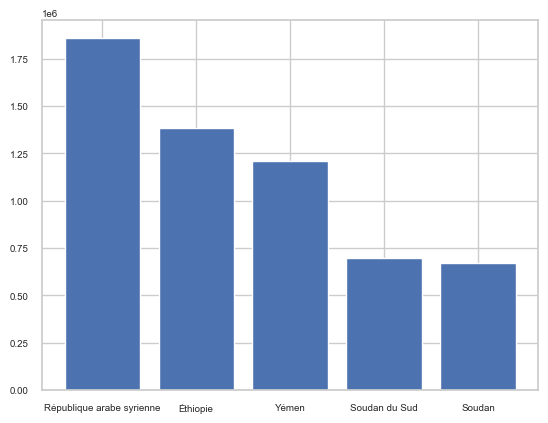

In [ ]:
values = [1858943, 1381294, 1206484, 695248, 669784]
zone =['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.bar(zone, values);

# Les pays ayant le plus/le moins de disponibilité/habitant

In [ ]:
dispo_pays = dispo_alimentaire.groupby('Zone').sum()['Disponibilité alimentaire (Kcal/personne/jour)']
dispo_pays.head()

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Algérie           3293.0
Allemagne         3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
dispo_pays.sort_values(ascending = False).head()

Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
dispo_ordre = dispo_pays.sort_values(ascending = False).tail()
dispo = dispo_ordre.reset_index()
dispo

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Haïti,2089.0
1,Afghanistan,2087.0
2,Madagascar,2056.0
3,Zambie,1924.0
4,République centrafricaine,1879.0


In [ ]:
import seaborn as sns
sns.set(style='whitegrid', font_scale=0.7)

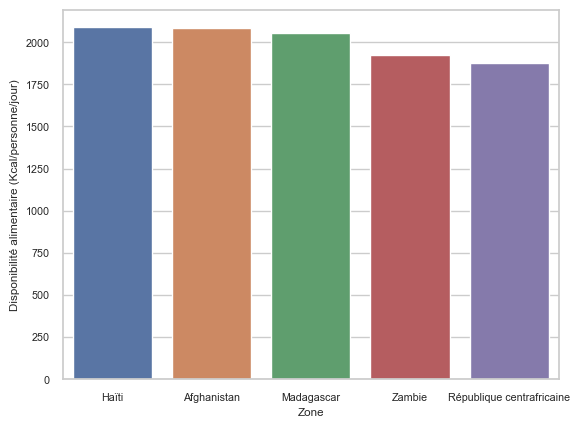

In [ ]:
sns.barplot(data=dispo, x='Zone',y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.show()

# L’utilisation des céréales
Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus. Peux-tu approfondir ce point ?

In [ ]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
liste = ['Avoine','Blé','Céréales, Autres','Maïs','Millet','Orge','Riz (Eq Blanchi)','Seigle','Sorgho']
liste

['Avoine',
 'Blé',
 'Céréales, Autres',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Seigle',
 'Sorgho']

In [ ]:
cereales_dispo_alimentaire = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste)]
cereales_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0


In [ ]:
dispo_cereales = cereales_dispo_alimentaire.groupby(by='Produit')[['Aliments pour animaux',
                           'Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].sum()
dispo_cereales

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Produit,,,,,,
Avoine,16251.0,206.0,3903.0,514.0,2485.0,36.0
Blé,129668.0,22424.0,457824.0,27530.0,34283.0,7877.0
"Céréales, Autres",19035.0,1388.0,5324.0,785.0,1203.0,160.0
Maïs,546116.0,189386.0,125184.0,40701.0,6837.0,47648.0
Millet,3306.0,196.0,23040.0,2276.0,682.0,403.0
Orge,92658.0,654.0,6794.0,4628.0,8804.0,26910.0
Riz (Eq Blanchi),33594.0,18464.0,377286.0,27378.0,12194.0,6740.0
Seigle,8099.0,20.0,5502.0,562.0,1262.0,1120.0
Sorgho,24808.0,2049.0,24153.0,2746.0,788.0,3695.0


In [ ]:
total_cereales = dispo_cereales.sum()
dispo_total = total_cereales.sum()

In [ ]:
c_animaux = cereales_dispo_alimentaire.sum()['Aliments pour animaux']
c_animaux

873535.0

In [ ]:
proportion_animaux = c_animaux/dispo_total * 100

In [ ]:
proportion_animaux.round(2)

36.28

In [ ]:
c_nourriture = cereales_dispo_alimentaire.sum()['Nourriture']
c_nourriture

1029010.0

In [ ]:
proportion_nourriture = c_nourriture /dispo_total * 100

In [ ]:
proportion_nourriture.round(2)

42.74

# L'utilisation du manioc par la Thaïlande

Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait l’exportation par rapport à la production... Peux-tu jeter un coup d’œil et nous faire un retour ?

In [ ]:
dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande'),:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [ ]:
sous_nutrition.loc[(sous_nutrition['Année'] == '2016-2018') & (sous_nutrition['Zone'] == 'Thaïlande'),:]

,Zone,Année,Valeur
1114,Thaïlande,2016-2018,6.2


In [ ]:
manioc_thai = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande'),:]
manioc_thai

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [ ]:
manioc_thai['Exportations - Quantité']/manioc_thai['Production']*100

13809    83.41273
dtype: float64

La quantité de manioc transformé en produits non alimentaires (aliments pour animaux, manioc séché, amidon,
bioéthanol) a augmenté. Ces systèmes s'inscrivent dans une chaîne de valeur intégrée tournée vers l'exportation
pour approvisionner les industries de transformation (aliments du bétail, glucose, bioplastiques, produits dérivés
de l'amidon, etc.) des pays fortement industrialisés (Chine, Corée, Japon, etc.).
L'intérêt de la Chine pour le manioc s'explique par la dynamique de sa filière éthanol.
En 2011, la Chine était le troisième producteur mondial d'éthanol, après les États-Unis et le Brésil.
Le Nigéria est le premier producteur de manioc, mais le système de distribution logistique pour l'exportation
n'est pas bien établi. En particulier, l'Asie du Sud-Est peut se permettre d'exporter du riz car c'est un aliment
de base, tandis que l'Afrique semble incapable d'exporter car le manioc est largement utilisé comme aliment.

En 2017, la Thaïlande a exporté équivalant 83 % de sa production alors que 6.2 millions de personnes souffraient de sous-nutrition.